In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
load=ctrl.Antecedent(np.arange(0,11,1),'load')
dirt=ctrl.Antecedent(np.arange(0,11,1),'dirt')
fabric=ctrl.Antecedent(np.arange(0,11,1),'fabric')
time=ctrl.Consequent(np.arange(0,6,1),'time')
water_level=ctrl.Consequent(np.arange(0,11,1),'water_level')

In [ ]:
load['small']=fuzz.trimf(load.universe,[0,2,4])
load['medium']=fuzz.trimf(load.universe,[3,5,7])
load['high']=fuzz.trimf(load.universe,[6,8,10])

In [ ]:
dirt['low']=fuzz.trimf(dirt.universe,[0,2,4])
dirt['medium']=fuzz.trimf(dirt.universe,[3,5,7])
dirt['high']=fuzz.trimf(dirt.universe,[6,8,10])

In [ ]:
fabric['mong']=fuzz.trimf(fabric.universe,[0,2,4])
fabric['binh thuong']=fuzz.trimf(fabric.universe,[3,5,7])
fabric['nang']=fuzz.trimf(fabric.universe,[6,8,10])

In [ ]:
time['fast']=fuzz.trimf(time.universe,[0,1,2])
time['medium']=fuzz.trimf(time.universe,[1,3,4])
time['low']=fuzz.trimf(time.universe,[2,5,6])

In [ ]:
water_level['low']=fuzz.trimf(water_level.universe,[0,2,4])
water_level['medium']=fuzz.trimf(water_level.universe,[3,5,7])
water_level['high']=fuzz.trimf(water_level.universe,[6,8,10])

In [ ]:
rule1=ctrl.Rule(load['small']& dirt['low'], (time['fast'], water_level['low']))
rule2=ctrl.Rule(load['small']& dirt['medium'], (time['medium'], water_level['medium']))
rule3=ctrl.Rule(load['small']& dirt['high'], (time['low'], water_level['medium']))

rule4=ctrl.Rule(load['medium']& dirt['low'], (time['medium'], water_level['medium']))
rule5=ctrl.Rule(load['medium']& dirt['medium'], (time['low'], water_level['medium']))
rule6=ctrl.Rule(load['medium']& dirt['high'], (time['low'], water_level['high']))

rule7=ctrl.Rule(load['high']& dirt['low'], (time['medium'], water_level['high']))
rule8=ctrl.Rule(load['high']& dirt['low'], (time['low'], water_level['high']))
rule9=ctrl.Rule(load['high']& dirt['medium'], (time['low'], water_level['high']))

rule10=ctrl.Rule(load['high']& dirt['high'], (time['low'], water_level['high']))
rule11=ctrl.Rule(fabric['mong'], (time['fast'], water_level['low']))
rule12=ctrl.Rule(fabric['binh thuong'], (time['fast'], water_level['low']))

rule13=ctrl.Rule(fabric['nang'], (time['low'], water_level['high']))
rule14=ctrl.Rule(load['high']& dirt['high']& fabric['nang'], (time['low'], water_level['high']))
rule15=ctrl.Rule(load['small']& dirt['low']& fabric['mong'], (time['low'], water_level['medium']))
rule16=ctrl.Rule(load['medium']& dirt['medium']& fabric['binh thuong'], (time['medium'], water_level['medium']))

time 2.5
water_level 4.571428571428571


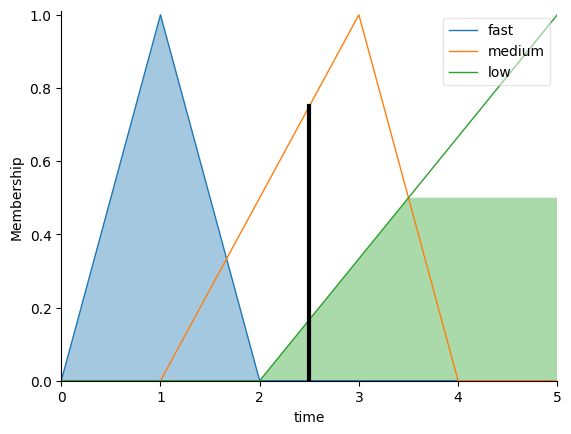

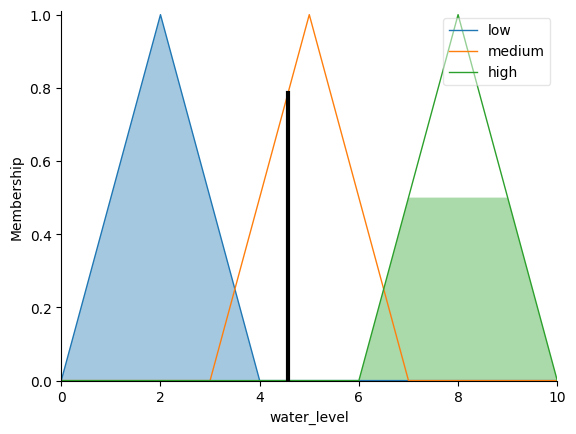

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
system=ctrl.ControlSystemSimulation(control_system)
system.input['load']=5
system.input['dirt']=9
system.input['fabric']=2
system.compute()
print('time',system.output['time'])
print('water_level',system.output['water_level'])
time.view(sim=system)
water_level.view(sim=system)